Install Packages


pip install scikit-learn
pip install -U scikit-learn
pip install lightgbm

In [1]:
import pandas as pd
data = pd.read_csv("E:\\Sakthi\\prasanth\\projects\\household\\power\\Scripts\\updated_features.csv")
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Hour,Is_peak_hour,Is_daytime
0,3.358,0.41800,234.84,17.960948,0.0,0.693147,2.890372,2006-12-16 17:24:00,Saturday,2.852621,0.086987,236.243763,12.721702,17,1,1
1,3.358,0.43600,233.63,17.960948,0.0,0.693147,2.833213,2006-12-16 17:25:00,Saturday,2.852621,0.086987,236.243763,12.721702,17,1,1
2,3.358,0.46188,233.29,17.960948,0.0,1.098612,2.890372,2006-12-16 17:26:00,Saturday,2.852621,0.086987,236.243763,12.721702,17,1,1
3,3.358,0.46188,233.74,17.960948,0.0,0.693147,2.890372,2006-12-16 17:27:00,Saturday,2.852621,0.086987,236.243763,12.721702,17,1,1
4,3.358,0.46188,235.68,15.800000,0.0,0.693147,2.890372,2006-12-16 17:28:00,Saturday,2.852621,0.086987,236.243763,12.721702,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.00000,240.43,4.000000,0.0,0.000000,0.000000,2010-11-26 20:58:00,Friday,1.163360,0.093262,240.291029,4.956264,20,1,0
2049276,0.944,0.00000,240.00,4.000000,0.0,0.000000,0.000000,2010-11-26 20:59:00,Friday,1.163360,0.093262,240.291029,4.956264,20,1,0
2049277,0.938,0.00000,239.82,3.800000,0.0,0.000000,0.000000,2010-11-26 21:00:00,Friday,1.163360,0.093262,240.291029,4.956264,21,1,0
2049278,0.934,0.00000,239.70,3.800000,0.0,0.000000,0.000000,2010-11-26 21:01:00,Friday,1.163360,0.093262,240.291029,4.956264,21,1,0


Trained with 6 Regression algo
1.Linear Regression 
2.Neural Networks
3.Random Forest
4.Gradient Boosting
5.LightGBM
6.Decision Tree

In [2]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Day', 'Global_active_power_daily_avg',
       'Global_reactive_power_daily_avg', 'Voltage_daily_avg',
       'Global_intensity_daily_avg', 'Hour', 'Is_peak_hour', 'Is_daytime'],
      dtype='object')

Features and Target Selection and Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features & target
features = [
    'Global_reactive_power', 'Voltage',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'Global_active_power_daily_avg', 'Global_reactive_power_daily_avg', 'Voltage_daily_avg',
    'Hour', 'Is_peak_hour', 'Is_daytime'
]

X = data[features]
y = data['Global_active_power']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define which columns to scale
cols_to_scale = [
    'Global_reactive_power', 'Voltage',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'Global_active_power_daily_avg', 'Global_reactive_power_daily_avg', 'Voltage_daily_avg'
]

# 'Hour', 'Is_peak_hour', 'Is_daytime' this 3 features are already in encoded format

# Initialize and fit the scaler only on training data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])

# Convert scaled arrays back into DataFrames with original column names & indices
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [7]:
display(X_train_scaled)

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Hour,Is_peak_hour,Is_daytime
2014695,0.236,244.14,0.000000,0.693147,0.000000,0.827140,0.127400,245.780491,20,1,0
1826677,0.084,243.73,0.000000,0.000000,0.693147,1.207154,0.127083,240.751382,15,0,1
1741165,0.098,240.21,0.000000,0.000000,0.000000,1.014151,0.102939,240.681229,6,0,1
1163580,0.074,244.49,0.000000,0.000000,2.995732,1.212447,0.089375,240.793313,15,0,1
167453,0.130,239.10,0.000000,0.693147,0.000000,0.373407,0.102647,240.256063,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
259178,0.092,238.64,0.000000,0.000000,0.000000,1.264464,0.164418,240.219181,7,0,1
1414414,0.116,240.63,0.000000,0.000000,2.995732,1.106068,0.195063,241.081257,18,1,1
131932,0.152,243.62,1.386294,0.000000,0.000000,1.463714,0.165257,241.047819,8,0,1
671155,0.052,238.16,0.000000,0.000000,2.890372,1.626672,0.119647,241.253549,12,0,1


In [ ]:
# Save the scaler model
import pickle
import os

scaler_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\scaler.pkl"
os.makedirs(os.path.dirname(scaler_path), exist_ok=True)

with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print(f"Scaler saved successfully at: {scaler_path}")

Scaler saved successfully at: E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\scaler.pkl


Model Training

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pickle
import os

# Trained model path
os.makedirs("trained_models", exist_ok=True)

def evaluate_model(name, model, X_train_scaled,  X_test_scaled, y_train, y_test):
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_scaled)

    # Model Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Results
    print(f"\n{name} Model Evaluation:")
    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : {rmse:.4f}")
    print(f"MAE      : {mae:.4f}")

    # Save the model
    model_path = f'trained_models/{name.lower().replace(" ", "_")}_model.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

Linear Regression Training and Evaluation

In [24]:
from sklearn.linear_model import LinearRegression
evaluate_model("Linear Regression", LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test)


Linear Regression Model Evaluation:
R² Score : 0.7749
RMSE     : 0.4346
MAE      : 0.3146


Validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(scores)
print(scores.mean())
print(scores.mean()*100)
print(scores.std())

[0.77356308 0.77288784 0.77374324 0.77311411 0.77347029]
0.7733557121576207
77.33557121576207
0.00031099215953647556


Optimization


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# param grid for LinearRegression 
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

# Create GridSearchCV
grid = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    scoring='r2',   # optimizing CV R²
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit search
grid.fit(X_train_scaled, y_train)

# Best CV results
print("Best CV params:", grid.best_params_)
print("Best CV R²  :", grid.best_score_)

# Evaluate best estimator on test set
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nLinear Regression (GridSearchCV tuned) Model Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best CV params: {'fit_intercept': True, 'positive': False}
Best CV R²  : 0.7733557121576207

Linear Regression (GridSearchCV tuned) Model Evaluation:
R² Score : 0.7749
RMSE     : 0.4346
MAE      : 0.3146


In [ ]:
# Save the best model if got more accuracy 
model_name = f"linear_regression_best_r2_{r2:.4f}".replace('.', '_')

os.makedirs("trained_models", exist_ok=True)
model_path = f"trained_models/{model_name}.pkl"

with open(model_path, 'wb') as f:
    pickle.dump(best_lr, f)

Feature Importance

Feature Importances (Linear Regression):
                            Feature  Coefficient  Importance
4                    Sub_metering_3     0.435517    0.435517
1                           Voltage    -0.268008    0.268008
5     Global_active_power_daily_avg     0.245163    0.245163
2                    Sub_metering_1     0.233308    0.233308
7                 Voltage_daily_avg     0.164621    0.164621
3                    Sub_metering_2     0.163970    0.163970
10                       Is_daytime    -0.116373    0.116373
9                      Is_peak_hour     0.095484    0.095484
6   Global_reactive_power_daily_avg    -0.073546    0.073546
0             Global_reactive_power     0.066311    0.066311
8                              Hour     0.014273    0.014273


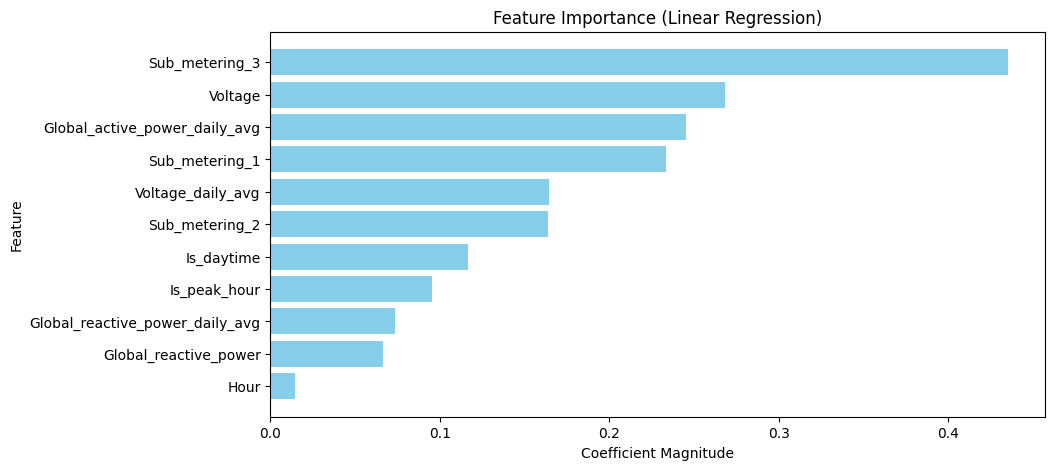

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load model
model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\linear_regression_model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

# Get coefficients
coefficients = model.coef_

# Convert to absolute values to show magnitude of influence
importance = np.abs(coefficients)

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Linear Regression):")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()


Neural Network Training and Evaluation

In [4]:
from sklearn.neural_network import MLPRegressor 
evaluate_model("Neural Net", MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test) # The first layer has 64 neurons to capture higher-level patterns, and the second layer has 32 neurons to refine those patterns.


Neural Net Model Evaluation:
R² Score : 0.8810
RMSE     : 0.3160
MAE      : 0.1958


Validation

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='r2', n_jobs=-1)
print("Neural Net CV Scores:", scores)
print("Mean R²:", scores.mean())
print("Mean R² (%):", scores.mean() * 100)
print("Std Dev:", scores.std())

Neural Net CV Scores: [0.86128605 0.84706295 0.86154365]
Mean R²: 0.8566308848925895
Mean R² (%): 85.66308848925895
Std Dev: 0.0067663660018182385


Optimization

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define base model
mlp = MLPRegressor(random_state=42, max_iter=300) # mx_iter is Epochs

# Define parameter grid (moderate size — safe for big dataset)
param_grid = {
    'hidden_layer_sizes': [ (100, 50), (64, 32)], # Number of neurons per layer ((50,), (100,),) removed
    'activation': ['relu'], # Nonlinear function ('tanh' removed)
    'solver': ['adam'], # Optimization algorithm
    'learning_rate_init': [0.01], # Initial learning rate removed (0.001, )
    'alpha': [0.01] # L2 regularization (weight decay)  removed (0.0001, 0.001,)
}

# Initialize GridSearchCV
mlp_grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='r2',
    cv=3,               # fewer folds for speed
    n_jobs=-1,          # use all cores
    verbose=2
)

# Fit model (optionally use subset for tuning if full data too large)
mlp_grid.fit(X_train_scaled[:200000], y_train[:200000])

# Results
print("Best Parameters:", mlp_grid.best_params_)
print("Best CV R² Score:", mlp_grid.best_score_)

# Get best model
best_mlp = mlp_grid.best_estimator_

# Evaluate on test set
y_pred = best_mlp.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nNeural Network (MLPRegressor) Model Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best CV R² Score: 0.8613084063840262

Neural Network (MLPRegressor) Model Evaluation:
R² Score : 0.8640
RMSE     : 0.3378
MAE      : 0.2130


Permutation Importance for Neural Network


Permutation Feature Importances (MLPRegressor):
                            Feature  Importance       Std
4                    Sub_metering_3    0.537021  0.000737
8                              Hour    0.229490  0.000889
1                           Voltage    0.212120  0.001224
2                    Sub_metering_1    0.210335  0.000567
5     Global_active_power_daily_avg    0.149163  0.000614
3                    Sub_metering_2    0.147175  0.000596
7                 Voltage_daily_avg    0.086940  0.000408
10                       Is_daytime    0.058522  0.000360
0             Global_reactive_power    0.046139  0.000082
9                      Is_peak_hour    0.036493  0.000275
6   Global_reactive_power_daily_avg    0.021857  0.000205


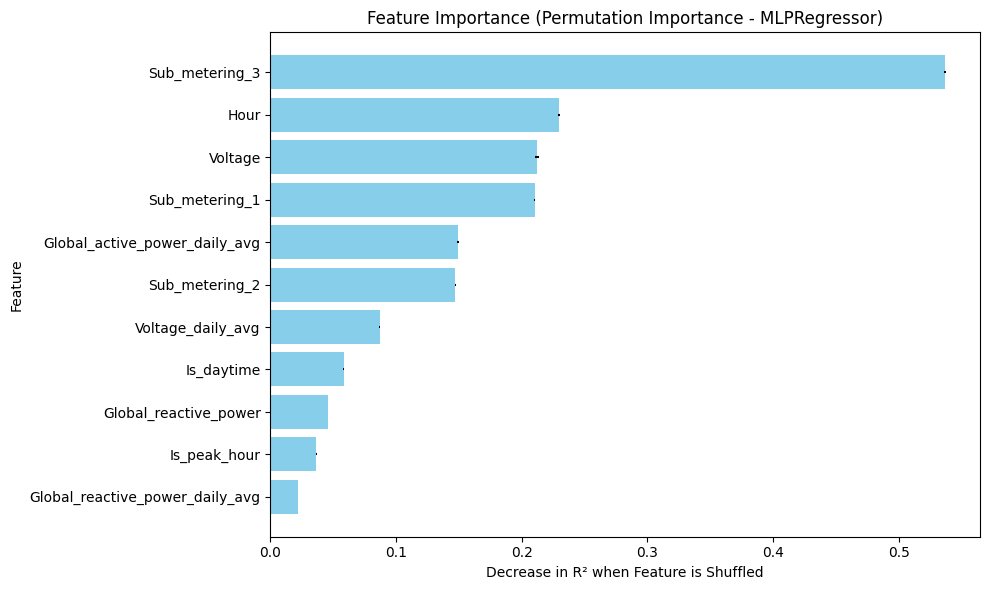

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Load your trained neural network
model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\neural_net_model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

# Compute permutation importance
# pass a test set
result = permutation_importance(
    model,
    X_test_scaled,
    y_test,
    n_repeats=10,           # repeat shuffling for stability
    random_state=42,
    n_jobs=-1
)

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Feature Importances (MLPRegressor):")
print(feature_importance_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], xerr=feature_importance_df['Std'], color='skyblue')
plt.xlabel('Decrease in R² when Feature is Shuffled')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance - MLPRegressor)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

RandomForestRegressor Evaluation

In [4]:
from sklearn.ensemble import RandomForestRegressor
evaluate_model("Random Forest", RandomForestRegressor(n_estimators=10, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)


Random Forest Model Evaluation:
R² Score : 0.9644
RMSE     : 0.1729
MAE      : 0.0711


Validation

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='r2', n_jobs=-1)
print("Random Forest CV Scores:", scores)
print("Mean R²:", scores.mean())
print("Mean R² (%):", scores.mean() * 100)
print("Std Dev:", scores.std())

Random Forest CV Scores: [0.95740815 0.95811541 0.95678844]
Mean R²: 0.9574373339068222
Mean R² (%): 95.74373339068222
Std Dev: 0.000542123962180985


Optimization

In [ ]:
# gridsearch_rf_regressor.py
import os
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# CONFIG
SAMPLE_SIZE = 200_000    # tune on a sample to keep GridSearch feasible (adjust to your RAM)
CV = 3
RANDOM_STATE = 42
N_JOBS = -1              # set to 1 if you run into memory issues
MODEL_DIR = "trained_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# param grid (change values as you like)
param_grid = {
    'n_estimators': [12, 8, 5],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Prepare a sample for GridSearchCV (keeps memory & time reasonable)
n_train = len(X_train_scaled)
if SAMPLE_SIZE >= n_train:
    X_sample = X_train_scaled
    y_sample = y_train
    print(f"Using full training data for search (n={n_train}). Be careful with memory/time.")
else:
    # preserve indices so y aligns with X
    X_sample = X_train_scaled.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE)
    y_sample = y_train.loc[X_sample.index]
    print(f"Using sample for search: {X_sample.shape}")

# Initialize estimator and GridSearchCV
estimator = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,     # GridSearchCV uses param_grid (list of lists/dicts)
    scoring='r2',              # for regression use 'r2' (or 'neg_mean_squared_error', etc.)
    cv=CV,
    n_jobs=N_JOBS,
    verbose=2
)

# Run grid search on the sample
print("\n=== Starting GridSearchCV (RandomForestRegressor) on sample ===")
grid_search.fit(X_sample, y_sample)
print("\n=== GridSearchCV complete ===")
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best CV R² from Grid Search CV:", grid_search.best_score_)

# Refit the best estimator on full training data
best_params = grid_search.best_params_
best_rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS, **best_params)
print("\nRefitting best RandomForest on FULL training set (this may take time)...")
best_rf.fit(X_train_scaled, y_train)
print("Refit complete.")

# Evaluate on test set
y_pred = best_rf.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nRandomForest (tuned -> refit) Model Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

Using sample for search: (200000, 11)

=== Starting GridSearchCV (RandomForestRegressor) on sample ===
Fitting 3 folds for each of 216 candidates, totalling 648 fits

=== GridSearchCV complete ===
Best parameters from Grid Search CV: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 12}
Best CV R² from Grid Search CV: 0.9039322452922524

Refitting best RandomForest on FULL training set (this may take time)...
Refit complete.

RandomForest (tuned -> refit) Model Evaluation:
R² Score : 0.9630
RMSE     : 0.1762
MAE      : 0.0792


Feature Importance

Feature Importances (Random Forest):
                            Feature  Importance
4                    Sub_metering_3    0.490167
2                    Sub_metering_1    0.121364
3                    Sub_metering_2    0.093353
5     Global_active_power_daily_avg    0.079335
8                              Hour    0.070811
1                           Voltage    0.044448
0             Global_reactive_power    0.032633
7                 Voltage_daily_avg    0.032470
6   Global_reactive_power_daily_avg    0.030002
10                       Is_daytime    0.003662
9                      Is_peak_hour    0.001756


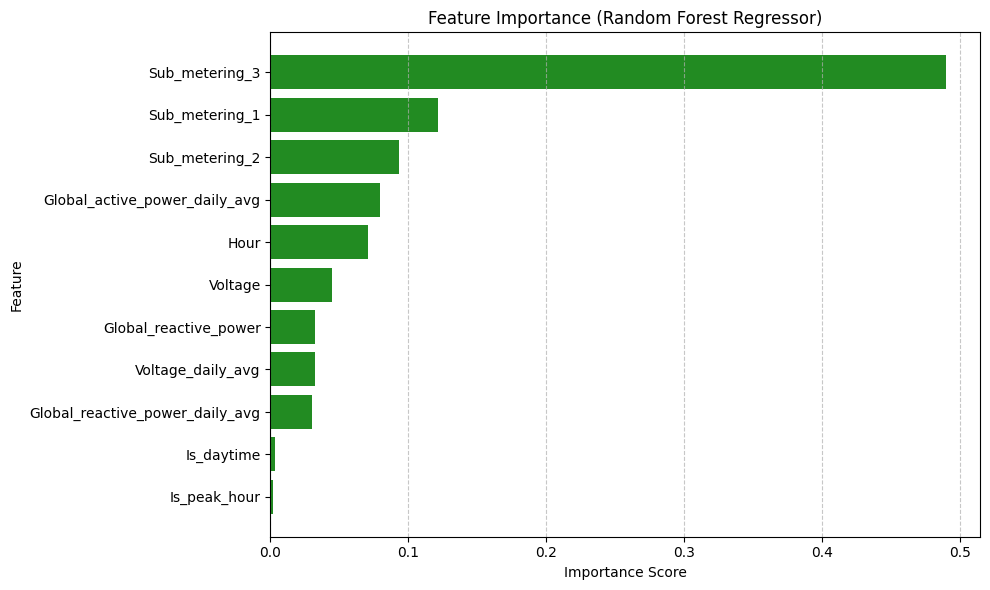

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\random_forest_model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

# Extract feature importances
# For tree models, we use `.feature_importances_`
importances = model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,        
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the table
print("Feature Importances (Random Forest):")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='forestgreen')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest Regressor)')
plt.gca().invert_yaxis()  # Most important feature at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

GradientBoostingRegressor Evaluation

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
evaluate_model("Gradient Boosting", GradientBoostingRegressor(n_estimators=10, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)


Gradient Boosting Model Evaluation:
R² Score : 0.6282
RMSE     : 0.5585
MAE      : 0.4282


Validation

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=10, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print("Gradient Boosting CV Scores:", scores)
print("Mean R²:", scores.mean())
print("Mean R² (%):", scores.mean() * 100)
print("Std Dev:", scores.std())


Gradient Boosting CV Scores: [0.62752977 0.62600176 0.62651907 0.62604616 0.62724839]
Mean R²: 0.6266690300327363
Mean R² (%): 62.66690300327363
Std Dev: 0.0006216512609524104


Optimization

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [12, 5, 8],          # number of boosting rounds
    'learning_rate': [ 0.05],            # shrinkage (0.1,01)
    'max_depth': [3, 5],                 # tree depth (7) removed
    'min_samples_split': [2, 5],         # (10) removed
    'min_samples_leaf': [1, 2],          # (4)
    'subsample': [0.6, 0.8],                # row subsampling per tree (stochastic GB)  (1.0) removed
    'max_features': ['sqrt', 'log2', None], # features to consider when looking for best split
    'loss': ['squared_error', 'huber']      # squared_error (MSE) or robust huber
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Use a subset for tuning if whole training data is too big (you used 200k for RF)
SAMPLE = 200_000
gb_grid.fit(X_train_scaled[:SAMPLE], y_train[:SAMPLE])

print("Best params:", gb_grid.best_params_)
print("Best CV R²:", gb_grid.best_score_)

# After you get best params, refit on full training data:
best_params = gb_grid.best_params_
best_gb = GradientBoostingRegressor(random_state=42, **best_params)
best_gb.fit(X_train_scaled, y_train)

# Evaluate (example)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
y_pred = best_gb.predict(X_test_scaled)
print("\nGradientBoosting (tuned, refit on full) evaluation:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best params: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 12, 'subsample': 0.6}
Best CV R²: 0.5484241661839792

GradientBoosting (tuned, refit on full) evaluation:
R²: 0.5487293157301745
RMSE: 0.6153738452700477
MAE: 0.485708690601245


Feature Importance

Feature Importances (Gradient Boosting):
                            Feature  Importance
4                    Sub_metering_3    0.676626
2                    Sub_metering_1    0.154293
3                    Sub_metering_2    0.106328
8                              Hour    0.039027
5     Global_active_power_daily_avg    0.020543
1                           Voltage    0.003183
0             Global_reactive_power    0.000000
6   Global_reactive_power_daily_avg    0.000000
7                 Voltage_daily_avg    0.000000
9                      Is_peak_hour    0.000000
10                       Is_daytime    0.000000


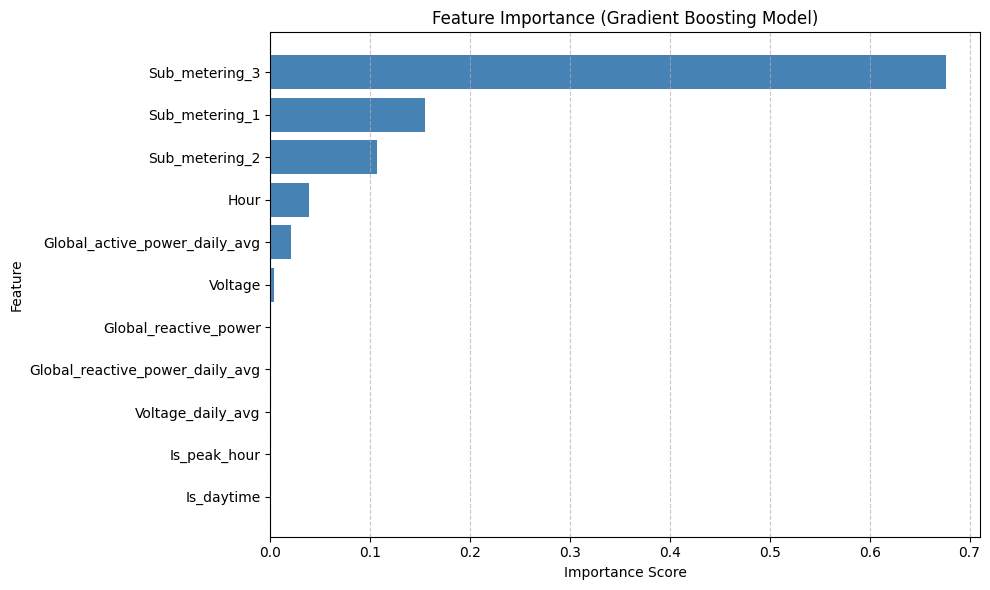

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\gradient_boosting_model.pkl"

with open(model_path, "rb") as f:
    model = pickle.load(f)

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance table
print("Feature Importances (Gradient Boosting):")
print(feature_importance_df)

# Plot feature importance 
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance (Gradient Boosting Model)')
plt.gca().invert_yaxis()  # show most important feature at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

LGBMRegressor Training and Evaluation

In [8]:
from lightgbm import LGBMRegressor

evaluate_model("LightGBM",LGBMRegressor(n_estimators=10, random_state=42, n_jobs=-1), X_train_scaled, X_test_scaled, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 1639424, number of used features: 11
[LightGBM] [Info] Start training from score 1.048139

LightGBM Model Evaluation:
R² Score : 0.7235
RMSE     : 0.4817
MAE      : 0.3658


Validation

In [8]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=10, random_state=42, n_jobs=-1)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print("LightGBM CV Scores:", scores)
print("Mean R²:", scores.mean())
print("Mean R² (%):", scores.mean() * 100)
print("Std Dev:", scores.std())

LightGBM CV Scores: [0.72287136 0.72167889 0.72286087 0.72182125 0.72314108]
Mean R²: 0.7224746883991472
Mean R² (%): 72.24746883991472
Std Dev: 0.000601801670845975


Optimization

In [ ]:
# gridsearch_lgbm_regressor.py
import os
import pickle
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

SAMPLE_SIZE = 200_000 
CV = 3
RANDOM_STATE = 42
N_JOBS = -1             
MODEL_DIR = "trained_models"
os.makedirs(MODEL_DIR, exist_ok=True)

param_grid = {
    'num_leaves': [31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [12, 5, 8],
    'max_depth': [-1, 10, 20]
}

# Assumes X_train_scaled, X_test_scaled, y_train, y_test exist in your environment
n_train = len(X_train_scaled)
if SAMPLE_SIZE >= n_train:
    X_sample = X_train_scaled
    y_sample = y_train
    print(f"Using full training data for search (n={n_train}). Be careful with memory/time.")
else:
    X_sample = X_train_scaled.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE)
    y_sample = y_train.loc[X_sample.index]

estimator = LGBMRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='r2',
    cv=CV,
    n_jobs=N_JOBS,
    verbose=2,
    return_train_score=True
)


print("\n=== Starting GridSearchCV (LGBMRegressor) on sample ===")
grid_search.fit(X_sample, y_sample)
print("\n=== GridSearchCV complete ===")
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best CV R² from Grid Search CV:", grid_search.best_score_)

# Refit the best estimator on full training data
best_params = grid_search.best_params_
best_lgbm = LGBMRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS, **best_params)
print("\nRefitting best LGBMRegressor on FULL training set (this may take time)...")
best_lgbm.fit(X_train_scaled, y_train)
print("Refit complete.")

# Evaluate on test set
y_pred = best_lgbm.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nLGBMRegressor (tuned -> refit) Model Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")


=== Starting GridSearchCV (LGBMRegressor) on sample ===
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1442
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 11
[LightGBM] [Info] Start training from score 1.051444

=== GridSearchCV complete ===
Best parameters from Grid Search CV: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 12, 'num_leaves': 63}
Best CV R² from Grid Search CV: 0.7749217048568541

Refitting best LGBMRegressor on FULL training set (this may take time)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set

In [ ]:
#save the best model after optimization
os.makedirs("trained_models", exist_ok=True)

model_name = f"best_lgbm_r2_{r2:.4f}".replace('.', '_')
model_path = f"trained_models/{model_name}.pkl"

with open(model_path, 'wb') as f:
    pickle.dump(best_lgbm, f)

Feature Importance

Features by Gain (%) in LightGBM:
            Feature              Split Importance  Gain (%)
                 Sub_metering_3         24          59.05% 
                 Sub_metering_1         27          14.39% 
                 Sub_metering_2         29          10.80% 
                           Hour         53           6.22% 
  Global_active_power_daily_avg         84           5.77% 
                        Voltage         37           1.98% 
          Global_reactive_power         35           1.28% 
                   Is_peak_hour          3           0.33% 
              Voltage_daily_avg          6           0.14% 
                     Is_daytime          1           0.03% 
Global_reactive_power_daily_avg          1           0.02% 


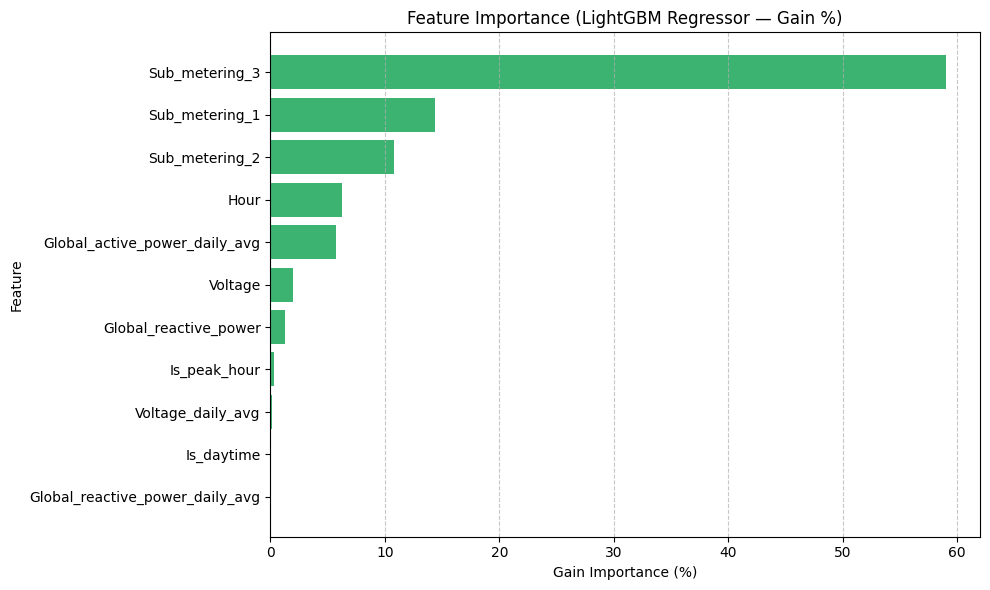

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import pickle

# Load trained LightGBM model
model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\lightgbm_model.pkl"

with open(model_path, "rb") as f:
    model = pickle.load(f)

# Extract feature importances
importance_split = model.booster_.feature_importance(importance_type='split')
importance_gain = model.booster_.feature_importance(importance_type='gain')

feature_importance_df = pd.DataFrame({
    'Feature': model.booster_.feature_name(),
    'Split Importance': importance_split,
    'Gain Importance': importance_gain
})

# Convert Gain Importance to %
total_gain = feature_importance_df['Gain Importance'].sum()
feature_importance_df['Gain (%)'] = 100 * feature_importance_df['Gain Importance'] / total_gain

# Sort descending by Gain (%)
feature_importance_df = feature_importance_df.sort_values(by='Gain (%)', ascending=False)

# Print features (percent)
print("Features by Gain (%) in LightGBM:")
print(feature_importance_df[['Feature', 'Split Importance', 'Gain (%)']].head(11).to_string(index=False, justify='center', float_format=lambda x: f"{x:.2f}%"))

# Plot Gain-based Feature Importance (%)
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Gain (%)'],
    color='mediumseagreen'
)
plt.xlabel('Gain Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importance (LightGBM Regressor — Gain %)')
plt.gca().invert_yaxis()  # most important at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
# Evaluate Decision Tree Regressor
evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)


Decision Tree Model Evaluation:
R² Score : 0.9403
RMSE     : 0.2237
MAE      : 0.0756


Validation

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
print("Decision Tree CV Scores:", scores)
print("Mean R²:", scores.mean())
print("Mean R² (%):", scores.mean() * 100)
print("Std Dev:", scores.std())

Decision Tree CV Scores: [0.93423924 0.93350904 0.93480289 0.93337581 0.9328039 ]
Mean R²: 0.933746174375854
Mean R² (%): 93.3746174375854
Std Dev: 0.0006987203032305737


Optimization

In [ ]:
import os
import pickle
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -------------------------
# CONFIG
# -------------------------
SAMPLE_SIZE = 200_000
CV = 3
RANDOM_STATE = 42
N_JOBS = -1              # DecisionTree itself is not heavily parallelized, but GridSearch uses n_jobs
MODEL_DIR = "trained_models"
os.makedirs(MODEL_DIR, exist_ok=True)


# Param grid for DecisionTreeRegressor
param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],  # 'squared_error' is MSE; 'friedman_mse' can be slightly faster/accurate in some sklearn versions
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2']  # None = all features
}

# Prepare sample for GridSearchCV
n_train = len(X_train_scaled)
if SAMPLE_SIZE >= n_train:
    X_sample = X_train_scaled
    y_sample = y_train
    print(f"Using full training data for search (n={n_train}). Be careful with memory/time.")
else:
    # preserve indices so y aligns with X
    X_sample = X_train_scaled.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE)
    y_sample = y_train.loc[X_sample.index]
    print(f"Using sample for search: {X_sample.shape}")

# Initialize estimator and GridSearchCV
estimator = DecisionTreeRegressor(random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='r2',              # regression metric
    cv=CV,
    n_jobs=N_JOBS,
    verbose=2,
    return_train_score=True
)

# Run grid search on the sample
print("\n=== Starting GridSearchCV (DecisionTreeRegressor) on sample ===")
grid_search.fit(X_sample, y_sample)
print("\n=== GridSearchCV complete ===")
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best CV R² from Grid Search CV:", grid_search.best_score_)

# Refit the best estimator on full training data
best_params = grid_search.best_params_
best_dt = DecisionTreeRegressor(random_state=RANDOM_STATE, **best_params)
print("\nRefitting best DecisionTree on FULL training set (this may take time depending on depth)...")
best_dt.fit(X_train_scaled, y_train)
print("Refit complete.")

# Save the tuned Decision Tree model
out_path = os.path.join(MODEL_DIR, "decision_tree_best_model.pkl")
with open(out_path, "wb") as f:
    pickle.dump(best_dt, f)
print(f"Saved best DecisionTree model to: {out_path}")

# Evaluate on test set
y_pred = best_dt.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nDecisionTree (tuned -> refit) Model Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")


Using sample for search: (200000, 11)

=== Starting GridSearchCV (DecisionTreeRegressor) on sample ===
Fitting 3 folds for each of 480 candidates, totalling 1440 fits

=== GridSearchCV complete ===
Best parameters from Grid Search CV: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV R² from Grid Search CV: 0.8649710320789189

Refitting best DecisionTree on FULL training set (this may take time depending on depth)...
Refit complete.
Saved best DecisionTree model to: trained_models\decision_tree_best_model.pkl

DecisionTree (tuned -> refit) Model Evaluation:
R² Score : 0.9397
RMSE     : 0.2249
MAE      : 0.1017


Feature Importance

Loaded model from: E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\decision_tree_model.pkl

Feature Importances (Decision Tree Regressor):
                            Feature  Importance
4                    Sub_metering_3    0.489981
2                    Sub_metering_1    0.121352
3                    Sub_metering_2    0.093601
5     Global_active_power_daily_avg    0.079453
8                              Hour    0.073449
1                           Voltage    0.043329
0             Global_reactive_power    0.032446
7                 Voltage_daily_avg    0.032130
6   Global_reactive_power_daily_avg    0.030692
9                      Is_peak_hour    0.001841
10                       Is_daytime    0.001725


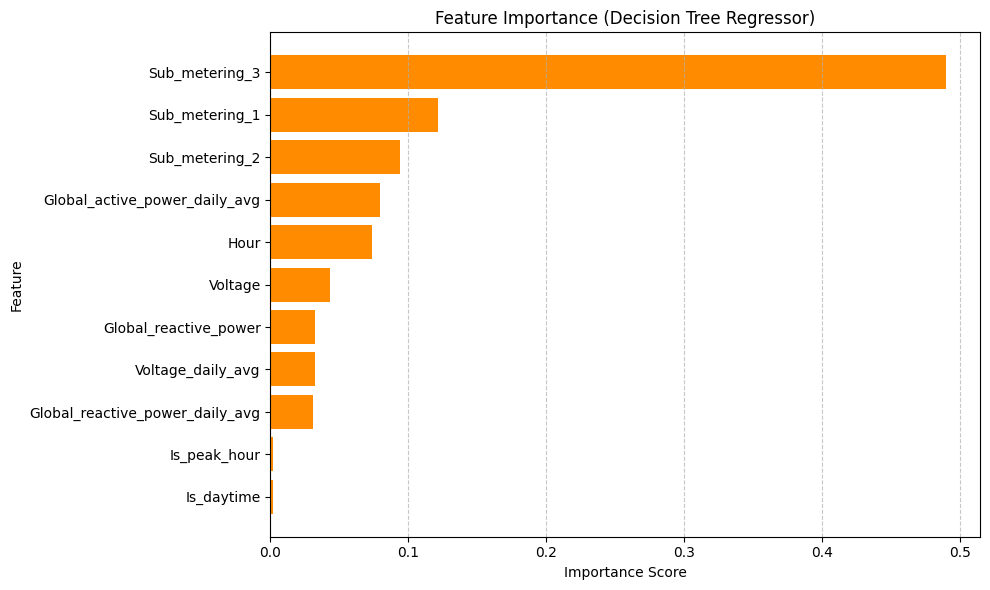

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load trained Decision Tree model
model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\decision_tree_model.pkl"

with open(model_path, "rb") as f:
    model = pickle.load(f)

print(f"Loaded model from: {model_path}")

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame for readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,   # assumes X has same feature order used for training
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("\nFeature Importances (Decision Tree Regressor):")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkorange')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree Regressor)')
plt.gca().invert_yaxis()  # show most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
display(X_train_scaled)

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Hour,Is_peak_hour,Is_daytime
2014695,0.236,244.14,0.000000,0.693147,0.000000,0.827140,0.127400,245.780491,20,1,0
1826677,0.084,243.73,0.000000,0.000000,0.693147,1.207154,0.127083,240.751382,15,0,1
1741165,0.098,240.21,0.000000,0.000000,0.000000,1.014151,0.102939,240.681229,6,0,1
1163580,0.074,244.49,0.000000,0.000000,2.995732,1.212447,0.089375,240.793313,15,0,1
167453,0.130,239.10,0.000000,0.693147,0.000000,0.373407,0.102647,240.256063,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
259178,0.092,238.64,0.000000,0.000000,0.000000,1.264464,0.164418,240.219181,7,0,1
1414414,0.116,240.63,0.000000,0.000000,2.995732,1.106068,0.195063,241.081257,18,1,1
131932,0.152,243.62,1.386294,0.000000,0.000000,1.463714,0.165257,241.047819,8,0,1
671155,0.052,238.16,0.000000,0.000000,2.890372,1.626672,0.119647,241.253549,12,0,1


In [26]:
import pandas as pd
data = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\household\\power\\Scripts\\raw_features.csv')
data

,Datetime,key_0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Hour,Is_peak_hour,Is_daytime
0,2006-12-16 17:24:00,2006-12-16,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,17,1,1
1,2006-12-16 17:25:00,2006-12-16,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0,2.852621,0.086987,236.243763,12.721702,17,1,1
2,2006-12-16 17:26:00,2006-12-16,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0,2.852621,0.086987,236.243763,12.721702,17,1,1
3,2006-12-16 17:27:00,2006-12-16,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,17,1,1
4,2006-12-16 17:28:00,2006-12-16,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,2010-11-26,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,20,1,0
2049276,2010-11-26 20:59:00,2010-11-26,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,20,1,0
2049277,2010-11-26 21:00:00,2010-11-26,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,21,1,0
2049278,2010-11-26 21:01:00,2010-11-26,26/11/2010,21:01:00,0.934,0.00000,239.70,3.800000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,21,1,0


In [27]:
data.loc[[1026581, 1815]]

,Datetime,key_0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Hour,Is_peak_hour,Is_daytime
1026581,2008-12-01 09:44:00,2008-12-01,1/12/2008,09:44:00,1.502,0.074,240.17,6.4,0.0,0.0,18.0,1.097654,0.082415,243.445840,4.721372,9,0,1
1815,2006-12-17 23:39:00,2006-12-17,17/12/2006,23:39:00,0.374,0.264,245.50,1.8,0.0,2.0,0.0,2.220100,0.156637,240.087028,9.793217,23,0,0


Sample Deployment

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np

model_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\random_forest_model.pkl"
scaler_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\trained_models\scaler.pkl"

# Feature order expected by the model
features = [
    'Global_reactive_power', 'Voltage',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'Global_active_power_daily_avg', 'Global_reactive_power_daily_avg', 'Voltage_daily_avg',
    'Hour', 'Is_peak_hour', 'Is_daytime'
]

# Columns that were scaled when training the scaler
cols_to_scale = [
    'Global_reactive_power', 'Voltage',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'Global_active_power_daily_avg', 'Global_reactive_power_daily_avg', 'Voltage_daily_avg'
]

# Base example rows (raw values)
rows = {
    1026581: {
        'Global_reactive_power': 0.074,
        'Voltage': 240.17,
        'Sub_metering_1': 0.0,
        'Sub_metering_2': 0.0,
        'Sub_metering_3': 18.0,
        'Global_active_power_daily_avg': 1.097654,
        'Global_reactive_power_daily_avg': 0.082415,
        'Voltage_daily_avg': 243.445840,
        'Hour': 9,
        'Is_peak_hour': 0,
        'Is_daytime': 1
    },
    1815: {
        'Global_reactive_power': 0.264,
        'Voltage': 245.50,
        'Sub_metering_1': 0.0,
        'Sub_metering_2': 2.0,
        'Sub_metering_3': 0.0,
        'Global_active_power_daily_avg': 2.220100,
        'Global_reactive_power_daily_avg': 0.156637,
        'Voltage_daily_avg': 240.087028,
        'Hour': 23,
        'Is_peak_hour': 0,
        'Is_daytime': 0
    }
}

test_log = pd.DataFrame.from_dict(rows, orient='index')[features]

for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    test_log[col] = np.log1p(test_log[col].astype(float))

# Load scaler and transform numeric columns
if not os.path.exists(scaler_path):
    raise FileNotFoundError(f"Scaler not found at: {scaler_path}")

with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)

# Ensure cols_to_scale exist
missing_for_scaler = [c for c in cols_to_scale if c not in test_log.columns]
if missing_for_scaler:
    raise KeyError(f"The following cols_to_scale are missing from the data: {missing_for_scaler}")

to_scale_vals = test_log[cols_to_scale].values
scaled_vals = scaler.transform(to_scale_vals)

test_scaled = test_log.copy()
test_scaled.loc[:, cols_to_scale] = scaled_vals

# Load model and predict
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model not found at: {model_path}")

with open(model_path, "rb") as f:
    model = pickle.load(f)

X_for_pred = test_scaled[features].values
preds = model.predict(X_for_pred)

# Build final output with only raw input data and prediction
output_df = test_log.copy()  # raw inputs
output_df = output_df.reset_index(drop=True)  # optional: drop original indices for cleaner print
output_df['predicted_Global_active_power'] = preds

pd.set_option("display.float_format", lambda x: f"{x:.6f}")
print("\nFinal inputs and predicted Global_active_power:")
print(output_df.to_string(index=True))

e:\Sakthi\prasanth\projects\household\power\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Sakthi\prasanth\projects\household\power\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Final inputs and predicted Global_active_power:
   Global_reactive_power    Voltage  Sub_metering_1  Sub_metering_2  Sub_metering_3  Global_active_power_daily_avg  Global_reactive_power_daily_avg  Voltage_daily_avg  Hour  Is_peak_hour  Is_daytime  predicted_Global_active_power
0               0.074000 240.170000        0.000000        0.000000        2.944439                       1.097654                         0.082415         243.445840     9             0           1                       1.504600
1               0.264000 245.500000        0.000000        1.098612        0.000000                       2.220100                         0.156637         240.087028    23             0           0                       0.388600


In [35]:
y_test.loc[[1026581, 1815]]

1026581   1.502000
1815      0.374000
Name: Global_active_power, dtype: float64